In [65]:
# import the required libraries
import os
import itertools
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn import tree
from sklearn.neural_network import MLPClassifier


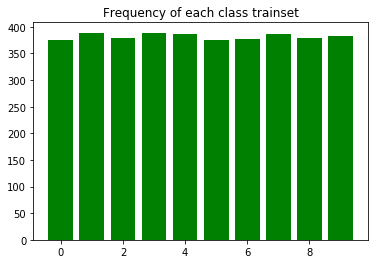

In [66]:
class_name=[0,1,2,3,4,5,6,7,8,9]
class_frequency=[376,389,380,389 ,387 ,376,377,387,380,382]
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(class_name,class_frequency,color='green')
#plt.grid(True)
#plt.legend('number of K')
plt.title("Frequency of each class trainset")
plt.show()

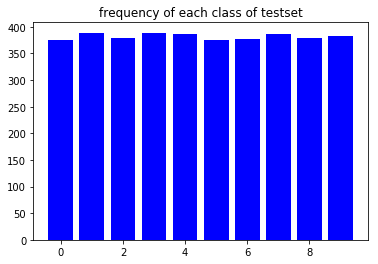

In [38]:
class_name=[0,1,2,3,4,5,6,7,8,9]
class_frequency_test=[178, 182,177,183,181,182,181,179,174,180]   
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(class_name,class_frequency,color='blue')
#plt.grid(True)
#plt.legend('number of K')
plt.title("frequency of each class of testset")
plt.show()

In [ ]:

# set the random state
np.random.seed(seed=300)

# load train and test data
trainset = np.loadtxt(open( 'optdigits.tra'), delimiter=",")
testset =np.loadtxt(open('optdigits.tes'),  delimiter=",")


In [ ]:
#we slide the training set and label of that from trainset and put in some matrices

df_x_train=trainset[:,0:63]
df_x_test=testset[:,0:63]
df_y_train=trainset[:,64]
df_y_test=testset[:,64]

# spliting train set into 90% train and 10% validation set
Xtr, Xval, ytr, yval = train_test_split(df_x_train, df_y_train, test_size=0.10)

In [58]:
#i write this function to show the confusion matrix i write the function base on
#this link 
# https://stackoverflow.com/questions/40246277/how-to-change-the-ticks-in-a-confusion-matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
 
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print(title)

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('y_predicted')
    plt.ylabel('y_train')
   


Best n_neighbors: 1

Validation accuracy (KNN): 0.9896

Computing knn training time...
n_neighbors: 1, training took 0.0410 seconds.

confusion matrix of trainset for KNN 
[[376   0   0   0   0   0   0   0   0   0]
 [  0 389   0   0   0   0   0   0   0   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 389   0   0   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   0   0   0   0   0 377   0   0   0]
 [  0   0   0   0   0   0   0 387   0   0]
 [  0   0   0   0   0   0   0   0 380   0]
 [  0   0   0   0   0   0   0   0   0 382]]

Computing knn test time...
n_neighbors: 1 test took 2.0431 seconds.

Test accuracy (KNN): 0.9800

confusion matrix of testset for KNN
[[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   0   0   1   0]
 [  0   2 175   0   0   0   0   0   0   0]
 [  0   0   0 179   0   0   0   2   0   2]
 [  0   2   0   0 178   0   0   0   1   0]
 [  0   0   0   0   1 179   0   0   0   2]
 [  

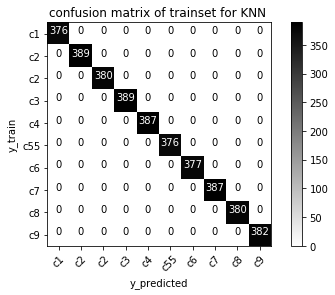

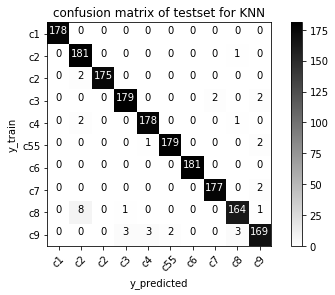

In [67]:
k_array = np.arange(1,20,1)
tick_label = ['c1','c2','c2','c3','c4','c55','c6','c7','c8','c9']
# an empty list to store validation accuracies
val_scores_knn = []

# compute knn classifier accuracy for each k

best_knn = None
best_acc_knn = -1
for k in k_array:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtr, ytr)
    val_acc_knn = knn.score(Xval, yval) # accuracy for validation set
    val_scores_knn.append(val_acc_knn)
    if val_acc_knn > best_acc_knn:
        best_knn = knn
        best_acc_knn = val_acc_knn

# choose the optimal k
best_k = k_array[val_scores_knn.index(max(val_scores_knn))]


print ("Best n_neighbors: {}\n".format(best_k))

# Best model accuracy on validation set
print("Validation accuracy (KNN): {:.4f}".format(best_knn.score(Xval, yval)))



# compute knn train time
print('\nComputing knn training time...')
start = time.time()
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(df_x_train, df_y_train)
print("n_neighbors: {}, training took {:.4f} seconds.\n".format(best_k, time.time() - start))

y_pred_train_knn = knn.predict(df_x_train)
conf_knn_train = confusion_matrix(df_y_train, y_pred_train_knn)
plot_confusion_matrix(conf_knn_train, classes=tick_label, title="confusion matrix of trainset for KNN ")
plt.figure(1)



# compute knn test time
start = time.time()
print('\nComputing knn test time...')
y_pred_test_knn = knn.predict(df_x_test)
print("n_neighbors: {} test took {:.4f} seconds.\n".format(best_k, time.time() - start))
print("Test accuracy (KNN): {:.4f}\n".format(knn.score(df_x_test, df_y_test)))

# plot test set confusion matrix
conf_knn_test = confusion_matrix(df_y_test, y_pred_test_knn)
plot_confusion_matrix(conf_knn_test, classes=tick_label, title="confusion matrix of testset for KNN")
#plt.figure(2)
print("The process finish.")
plt.show(2)

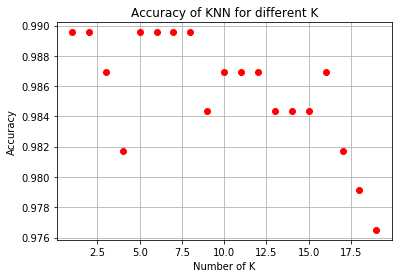

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_array,val_scores_knn,'ro')
plt.grid(True)

plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.title("Accuracy of KNN for different K")
plt.show()

In [7]:
max_accuarcy=val_scores_knn.index(max(val_scores_knn))+1
min_accuaracy=val_scores_knn.index(min(val_scores_knn))+1
print("best accuarcy of k for KNN: {}, training took {:.4f} seconds.\n".format(max_accuarcy, time.time() - start))
print("worst accuarcy of k for KNN: {}, training took {:.4f} seconds.\n".format(min_accuaracy, time.time() - start))

best accuarcy of k for KNN: 1, training took 33.8750 seconds.

worst accuarcy of k for KNN: 19, training took 33.8760 seconds.




##################################################
Hyper-parameters tunning for linear classifier...
##################################################
Best alpha: 0.5

Validation accuracy (Linear classifier): 0.9608

Computing linear classifier training time...
alpha: 0.5, training took 0.0936 seconds.

confusion matrix of linear discriminant for trainset
[[372   0   0   0   1   1   1   0   0   1]
 [  0 361   5   0   0   0   0   2  17   4]
 [  0   1 369   0   0   0   1   1   5   3]
 [  0   2   3 356   0   5   0   1   9  13]
 [  0   1   0   0 370   0   2   0   5   9]
 [  0   0   2   1   0 366   0   0   1   6]
 [  0   2   0   0   1   0 373   0   1   0]
 [  0   0   0   0   1   0   0 383   2   1]
 [  1   6   0   0   2   1   2   0 367   1]
 [  1   6   0   2   5   1   0   3   9 355]]


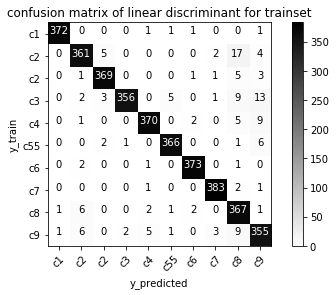


Computing linear classifier test time...
alpha: 0.5, test took 0.0040 seconds.

Test accuracy (linear classifier): 0.9332

confusion matrix of linear discriminant for testset
[[174   0   0   0   1   3   0   0   0   0]
 [  0 162   4   0   0   0   0   0   8   8]
 [  0   1 173   0   0   0   0   2   1   0]
 [  1   0   1 156   0   4   0   3  11   7]
 [  0   0   0   0 177   0   0   1   3   0]
 [  0   0   0   0   0 179   1   0   0   2]
 [  0   3   0   0   2   0 175   0   1   0]
 [  0   0   0   0   2   5   0 162   3   7]
 [  0  10   0   0   0   4   2   0 154   4]
 [  0   2   0   0   3   2   0   0   8 165]]


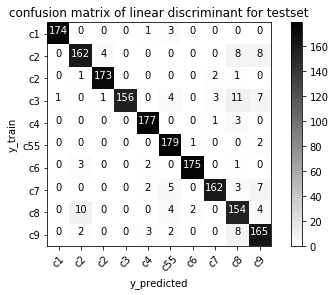

In [68]:
#this part of code is prepared for linear discriminant 


regs = [0.0005, 0.005, 0.05, 0.5, 5, 50]

# an empty list to store validation accuracies
val_scores_sgd = []

# compute linear classifier accuracy for each regularization strength

best_sgd = None
best_acc_sgd = -1
for reg in regs:
    sgd = linear_model.SGDClassifier(alpha=reg)
    sgd.fit(Xtr, ytr)
    val_acc_sgd = sgd.score(Xval, yval) # accuracy for validation set
    val_scores_sgd.append(val_acc_sgd)
    if val_acc_sgd > best_acc_sgd:
    	best_sgd = sgd
    	best_acc_sgd = val_acc_sgd

# choose the best regularization penalty
best_reg = regs[val_scores_sgd.index(max(val_scores_sgd))]
print ("Best alpha: {}\n".format(best_reg))


# Validation accuracy
y_pred_val_sgd = best_sgd.predict(Xval)
print("Validation accuracy (Linear classifier): {:.4f}".format(best_sgd.score(Xval, yval)))


# compute linear classifier train time
print('\nComputing linear classifier training time...')
start = time.time()
sgd = linear_model.SGDClassifier(alpha=best_reg)
sgd.fit(df_x_train, df_y_train)
print("alpha: {}, training took {:.4f} seconds.\n".format(best_reg, time.time() - start))

# train set confusion matrix
y_pred_train_sgd = sgd.predict(df_x_train)
conf_sgd_train = confusion_matrix(df_y_train, y_pred_train_sgd)
plot_confusion_matrix(conf_sgd_train, classes=tick_label,title="confusion matrix of linear discriminant for trainset")
plt.show()

# compute linear classifier test time
start = time.time()
print('\nComputing linear classifier test time...')
y_pred_test_sgd = sgd.predict(df_x_test)
print("alpha: {}, test took {:.4f} seconds.\n".format(best_reg, time.time() - start))
print("Test accuracy (linear classifier): {:.4f}\n".format(sgd.score(df_x_test, df_y_test)))

# plot test set confusion matrix
conf_sgd_test = confusion_matrix(df_y_test, y_pred_test_sgd)
plot_confusion_matrix(conf_sgd_test, classes=tick_label,title="confusion matrix of linear discriminant for testset")
plt.show()

0.96083550913838123


##################################################
Hyper-parameters tunning for MLP...
##################################################
Best hidden_layer_sizes: 64, Best alpha: 1

Validation accuracy (MLP): 0.9922

Computing MLP training time...
hidden_layer_sizes: 64, alpha: 1, training took 4.9266 seconds.

confusion matrix of multilayer perceptron for trainset
[[374   0   0   0   1   0   1   0   0   0]
 [  0 388   0   0   0   0   0   0   1   0]
 [  0   0 380   0   0   0   0   0   0   0]
 [  0   0   0 388   0   1   0   0   0   0]
 [  0   0   0   0 387   0   0   0   0   0]
 [  0   0   0   0   0 376   0   0   0   0]
 [  0   1   0   0   1   0 375   0   0   0]
 [  0   0   0   1   0   0   0 386   0   0]
 [  0   2   0   0   0   0   0   0 378   0]
 [  0   0   0   0   2   0   0   0   0 380]]


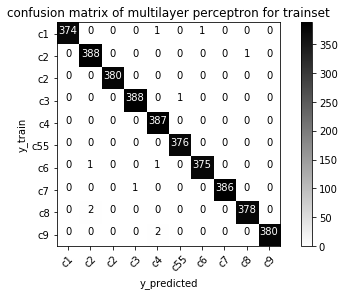


Computing MLP test time...
hidden_layer_sizes: 64, alpha: 1, test took 0.0150 seconds.
Test accuracy (MLP): 0.9594

confusion matrix of multilayer perceptron for trainset
[[176   0   0   0   1   1   0   0   0   0]
 [  0 180   0   0   0   0   0   0   2   0]
 [  0   7 169   0   0   0   0   0   1   0]
 [  0   0   3 173   0   2   0   0   2   3]
 [  0   1   0   0 178   0   0   0   2   0]
 [  0   0   1   0   0 177   1   0   1   2]
 [  0   0   0   0   2   0 178   0   1   0]
 [  0   0   0   0   1   7   0 164   1   6]
 [  0  10   0   1   0   3   0   0 156   4]
 [  0   1   0   1   2   1   0   0   2 173]]


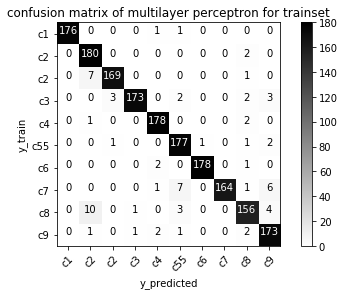

In [73]:

best_mlp = None
best_acc_mlp = -1
best_hls = []
best_reg = []
hls = [64, 128, 256, (64,64), (128,128), (256,256)]
regs = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
for hl in hls:
    for reg in regs:
    	mlp = MLPClassifier(solver='adam', alpha=reg, hidden_layer_sizes=hl)
    	mlp.fit(Xtr, ytr)
    	val_acc_mlp = mlp.score(Xval, yval) # accuracy for validation set
    	val_scores_sgd.append(val_acc_sgd)
    	if val_acc_mlp > best_acc_mlp:
    		best_mlp = mlp
    		best_acc_mlp = val_acc_mlp
    		best_hls = hl
    		best_reg = reg

# choose the best number of components
#best_n_components = n_components_array[val_scores_lda.index(max(val_scores_lda))]

# print best hyper-parameters
print ("Best hidden_layer_sizes: {}, Best alpha: {}\n".format(best_hls, best_reg))


# Validation accuracy
print("Validation accuracy (MLP): {:.4f}".format(best_mlp.score(Xval, yval)))


# compute MLP train time
print('\nComputing MLP training time...')
start = time.time()
mlp = MLPClassifier(solver='adam', alpha=best_reg, hidden_layer_sizes=best_hls)
mlp.fit(df_x_train, df_y_train)
print("hidden_layer_sizes: {}, alpha: {}, training took {:.4f} seconds.\n".format(best_hls, best_reg,\
														 time.time() - start))


# plot train set confusion matrix
y_pred_train_mlp = mlp.predict(df_x_train)
conf_mlp_train = confusion_matrix(df_y_train, y_pred_train_mlp)
plot_confusion_matrix(conf_mlp_train, classes=tick_label,title="confusion matrix of multilayer perceptron for trainset")
plt.show()

# compute MLP test time
start = time.time()
print('\nComputing MLP test time...')
y_pred_test_mlp = mlp.predict(df_x_test)
print("hidden_layer_sizes: {}, alpha: {}, test took {:.4f} seconds.".format(best_hls, best_reg,\
														 time.time() - start))
# print test accuracy MLP
print("Test accuracy (MLP): {:.4f}\n".format(mlp.score(df_x_test, df_y_test)))

# plot test set confusion matrix
conf_mlp_test = confusion_matrix(df_y_test, y_pred_test_mlp)
plot_confusion_matrix(conf_mlp_test, classes=tick_label,title="confusion matrix of multilayer perceptron for trainset")
plt.show()

In [70]:
best_hls

(256, 256)